# Step-wise comparison AoB2015
The results from Schymanski et al. (2015) are used as a benchmark and starting point from the current analysis. Several adjustmens have been made in the general set-up of the model, the effects of these choices are assessed in a stepwise approach:

0. Benchmark data
1. Reproducing benchmark results
2. Repeat SCE with input data AoB2015
3. Change the modelling period
4. Change atmospheric CO$_2$ to MaunaLoa records
5. Change soil layer thickness
6. Change atmospheric pressure from fixed to variable
7. Add rooting depth grasses as optimizable property
8. Change costfactor for water transport
9. Update the weatherdata with new SILO-data
10. New soil parameters and hydrology


## Reproducing benchmark results


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime, timedelta, date
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from scipy.misc import imread
import matplotlib.cbook as cbook


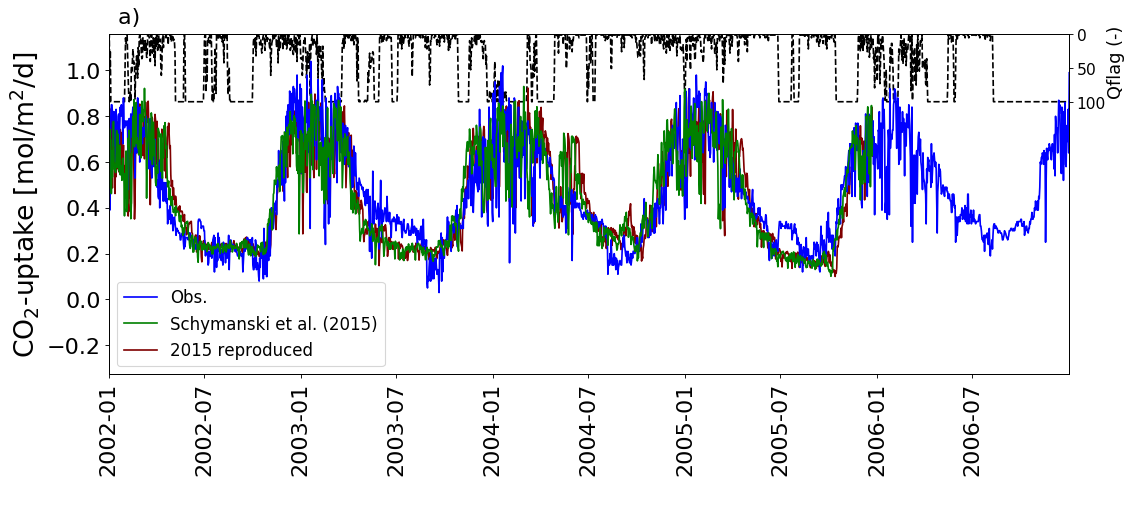

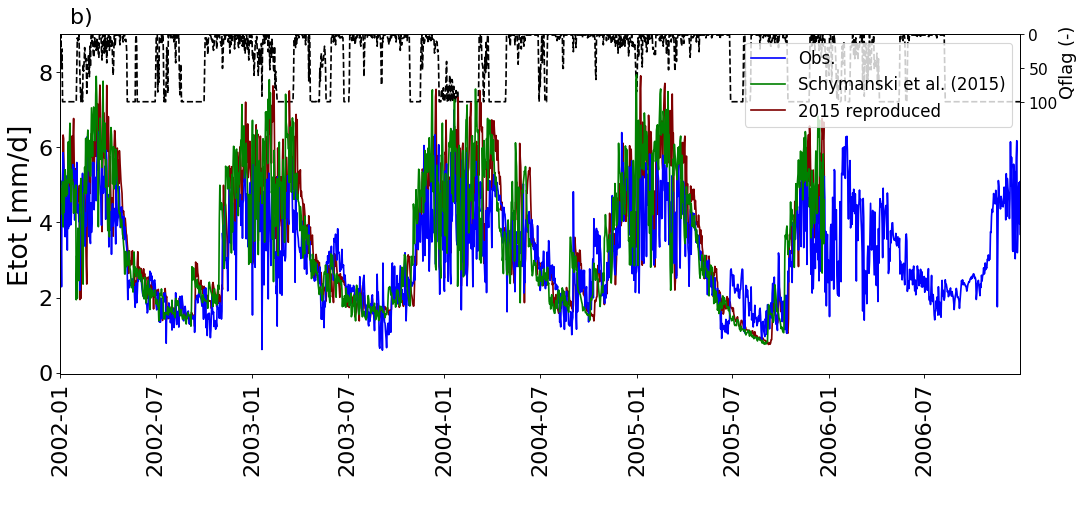

In [3]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "2015 reproduced" --title "a) " --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "2015 reproduced" --title "b)" --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt


**Figure S1.1.** Comparison for Howard Springs between the results of Schymanski et al. (2015) (green) and a reproduction of those results (brown) based on the best run of the SCE-algorithm from Schymanski et al. (2015), for a) assimilation and b) evaporation. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. In other words, the vegetation properties are not re-optimized and both model runs use the same vegetation properties. The results should therefore be completely identical. This is mostly the case, except for a small shift due to un-even years, which was not taken into account in the original data.

## Repeat SCE

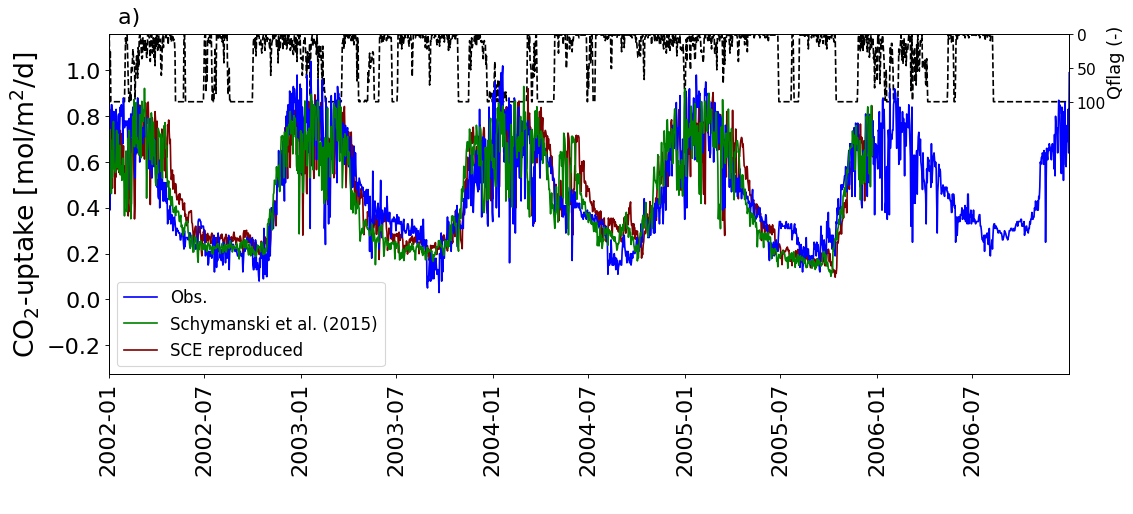

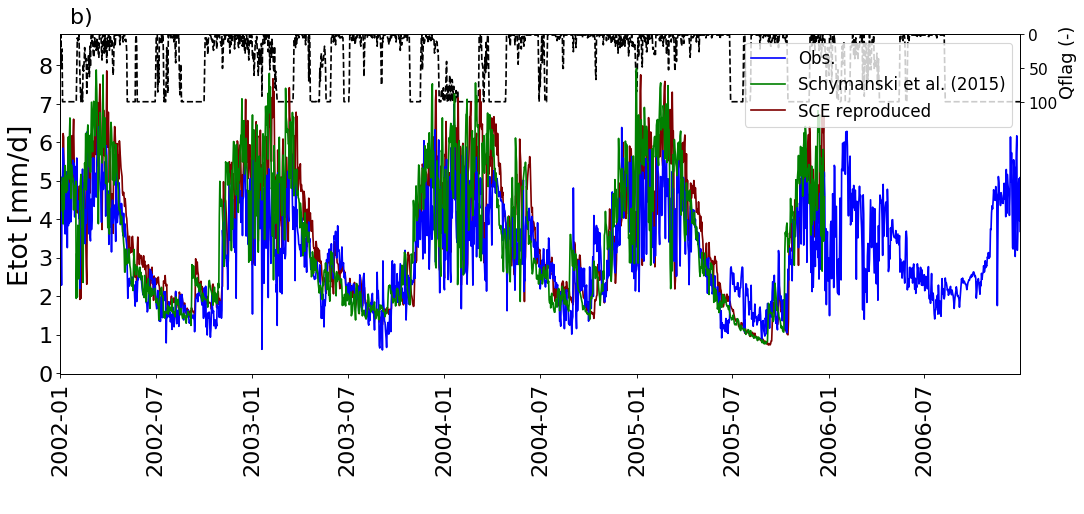

In [4]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "SCE reproduced" --title "a) " --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "SCE reproduced" --title "b)" --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt

**Figure S1.2.** Comparison for Howard Springs between the results of Schymanski et al. (2015) (green) and reproduced results (brown) by repeating the SCE-algorithm with the same settings and parameterization of Schymanski et al. (2015), for a) assimilation and b) evaporation. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. Theoretically, the results should be extremely similar, as the optimization should converge to similar vegetation properties. The differences between the results of Schymanski et al. (2015) and the reproduced results are minor, but a shift due to un-even years remains. 

## Change of modelling period


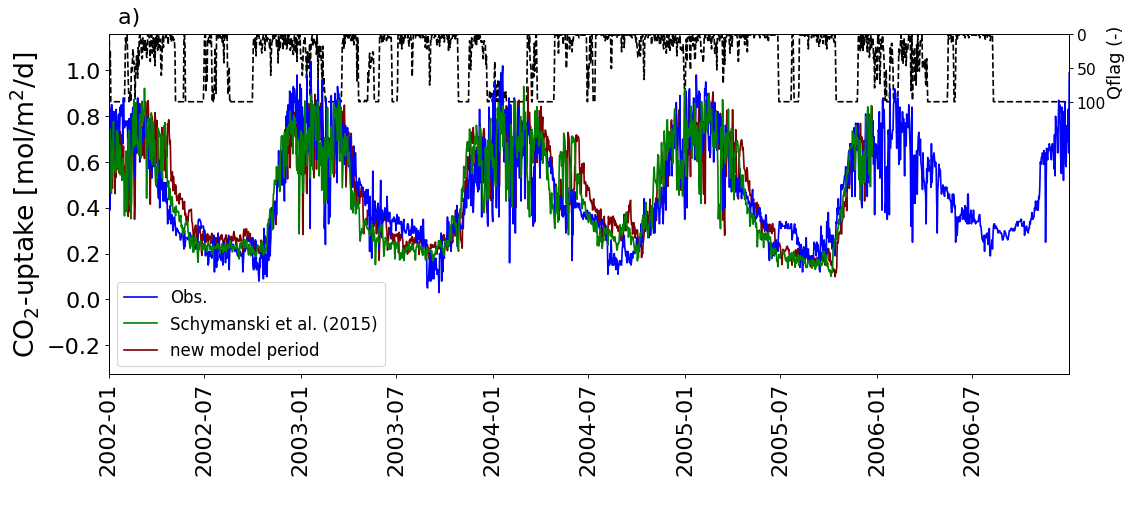

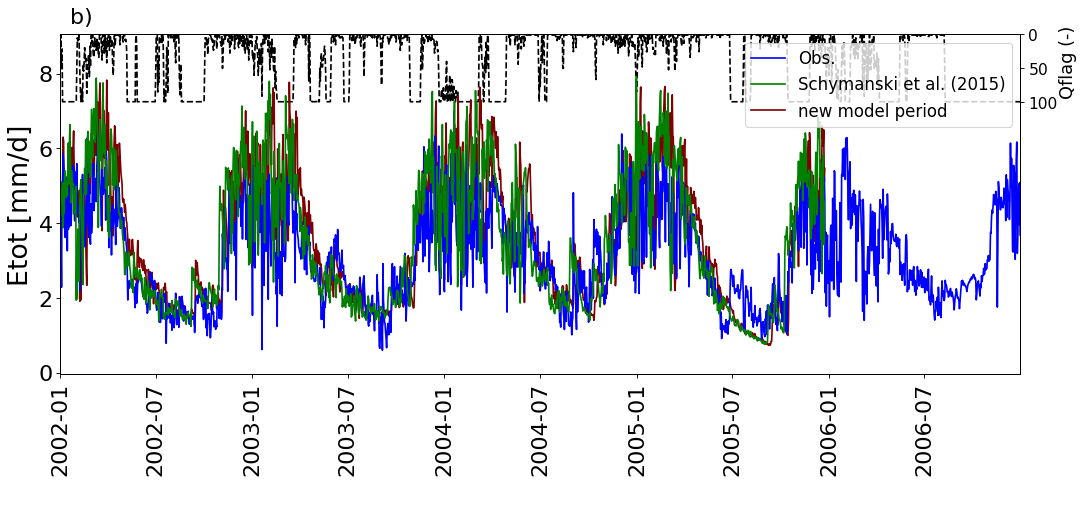

In [5]:
#results still on HPC

#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/3_modeltime/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "new model period" --title "a) " --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/3_modeltime/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]"  \
--labels "new model period" --title "b)" --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt

**Figure S1.3.** Comparison for Howard Springs between the results of Schymanski et al. (2015), where the model period was set from 1976 untill 2005, and new runs that start from 1980 untill 2017, with a) assimilation and b) evaporation. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. Small differences can be observed, but in a similar order of magnitude as when the SCE-algorithm is re-run (see Figure S1.2).


## Change of atmospheric CO$_2$-values


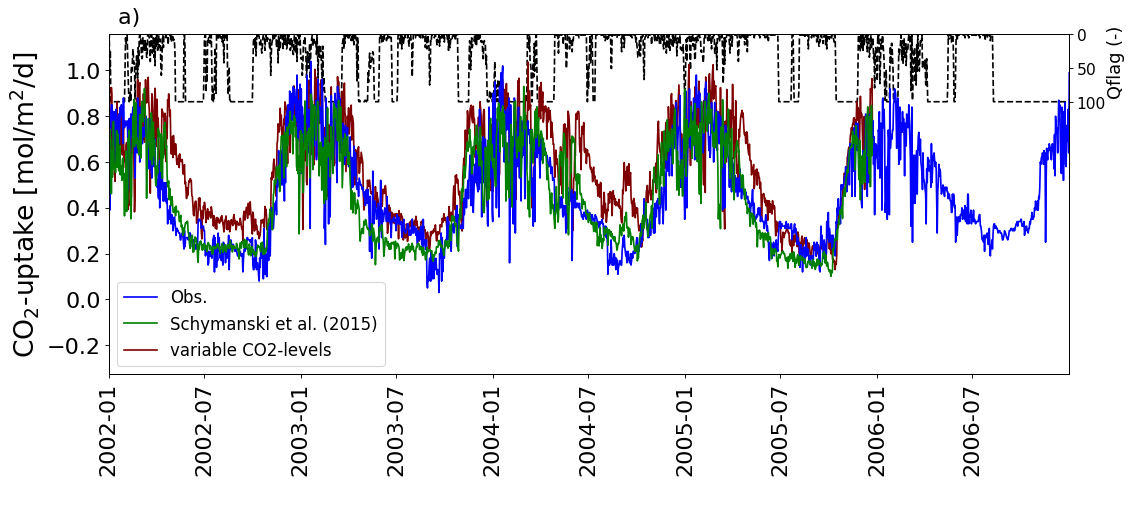

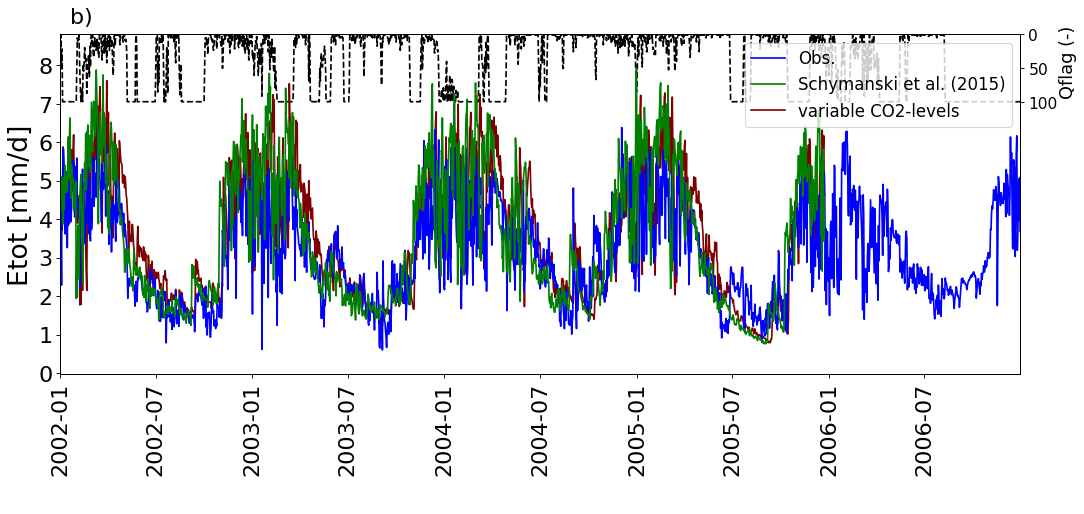

In [6]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/4_co2_var/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "variable CO2-levels" --title "a) " --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/4_co2_var/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "variable CO2-levels" --title "b) " --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt

**Figure S1.4**. Comparison for Howard Springs between the result of Schymanski et al. (2015), where atmospheric CO$_2$-values were fixed at 317ppm (green) and new runs that use the MaunaLoa-records as input with variable CO$_2$-levels (brown), for a) assimilation and b) evaporation. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. The declining limbs of the curves for assimilation differ, but the results for evaporation do not show such big differences. The values for atmospheric CO$_2$-levels are generally higher, leading therefore also to higher values of assimilation. 

## Change of soil layer thickness


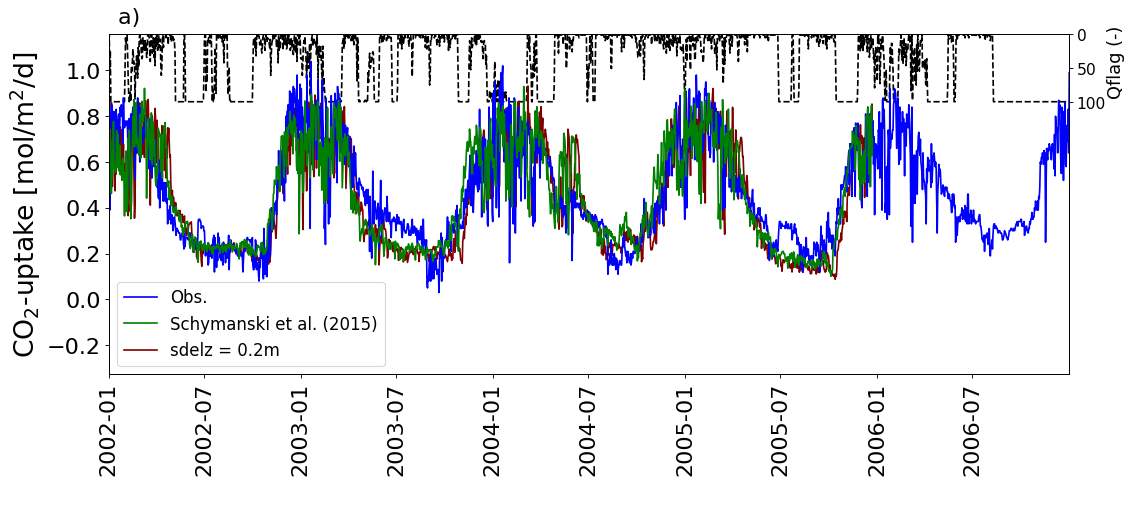

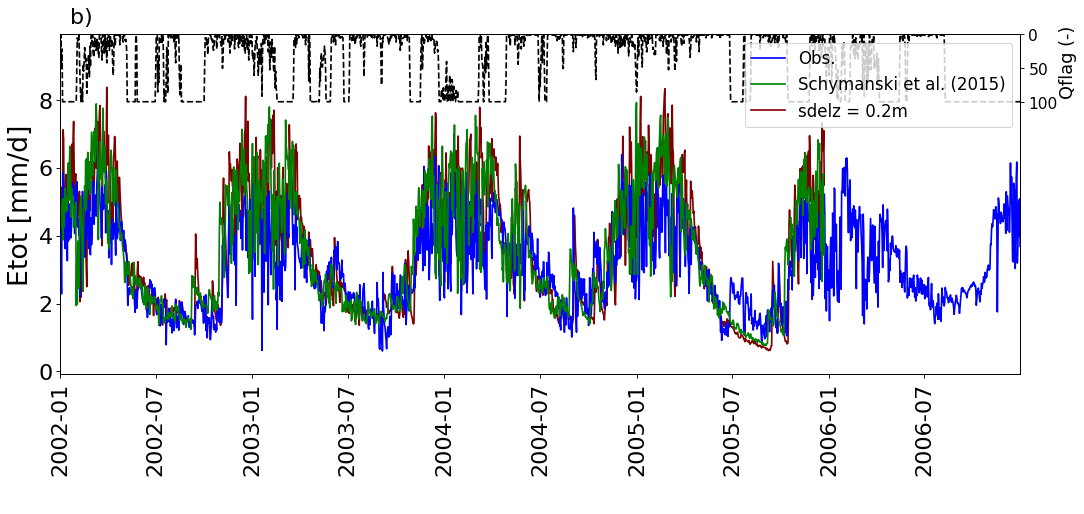

In [7]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/5_sdelz/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "sdelz = 0.2m" --title "a) " --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/5_sdelz/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "sdelz = 0.2m" --title "b) " --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt

**Figure S1.5**. Comparison for Howard Springs between the result of Schymanski et al. (2015), where soil layer thickness was set at 0.5m (green) and new runs that use use a soil layer thickness of 0.2m (brown), for a) assimilation and b) evaporation. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. The results for evaporation and assimilation have differences, but the differences are generally small and similar as differences occuring after re-running the SCE-optimization (Figure S1.2).


## Change of atmosperic pressures


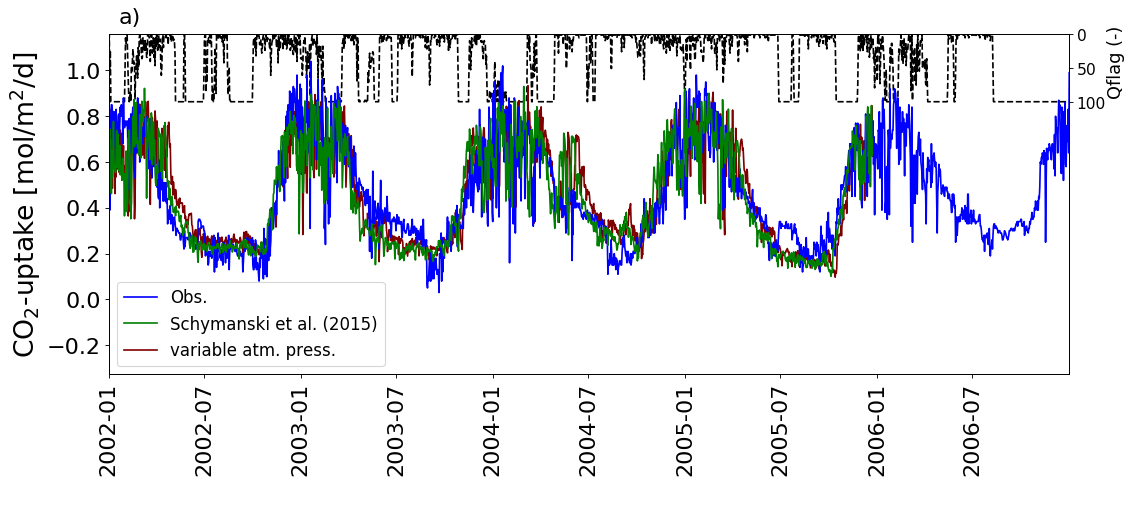

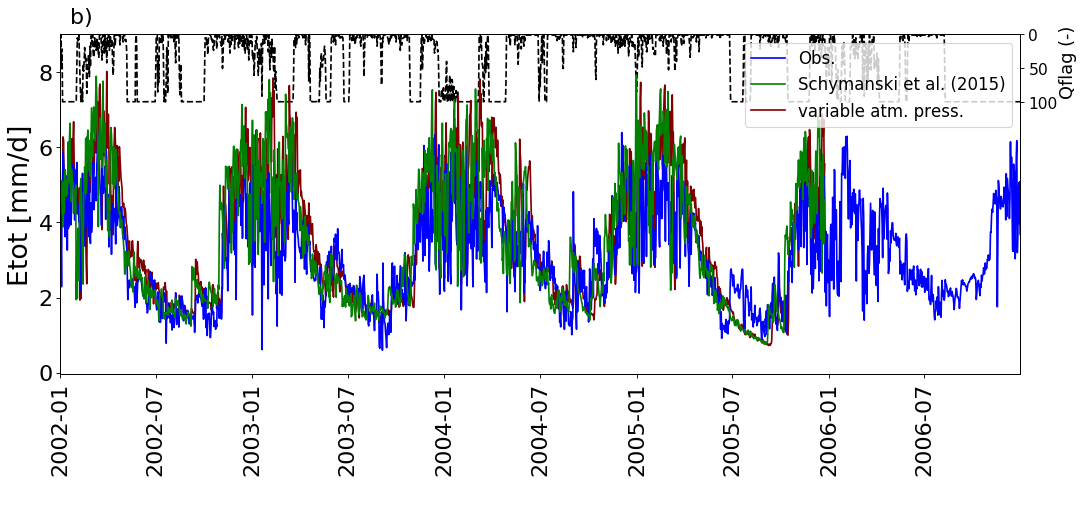

In [8]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/6_atm/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "variable atm. press." --title "a)" --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/6_atm/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "variable atm. press." --title "b)" --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt

**Figure S1.6**. Comparison for Howard Springs between the result of Schymanski et al. (2015), where atmosperic pressure was fixed at 1013.25 hPa (green) and new runs that use variable levels obtained from the SILO meteorological data (brown), for a) assimilation and b) evaporation. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. The results for evaporation and assimilation have differences, but the differences are generally small and similar as differences occuring after re-running the SCE-optimization (Figure S1.2).

## Optimizing rooting depths grasses

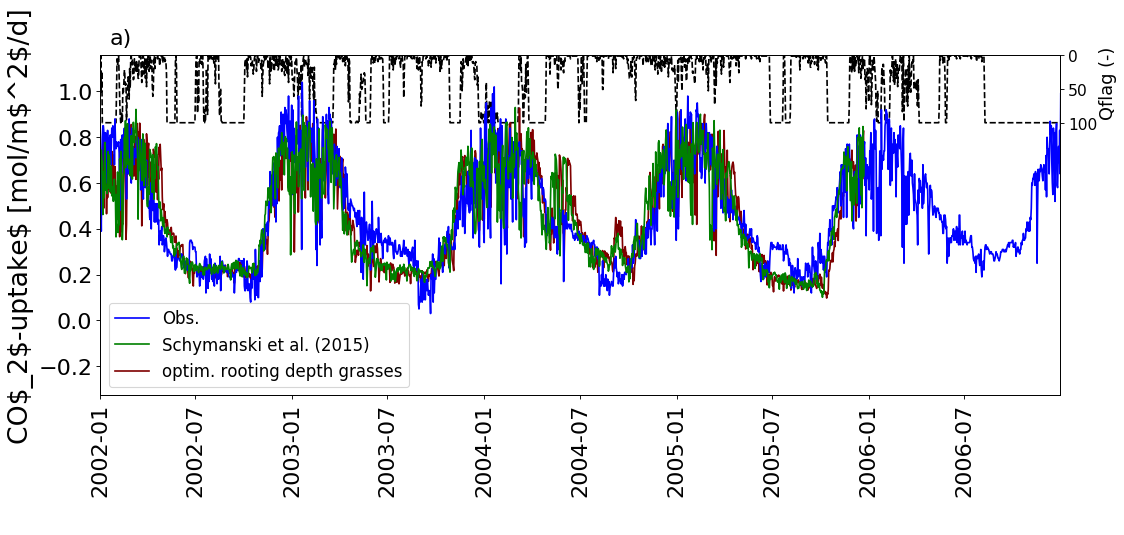

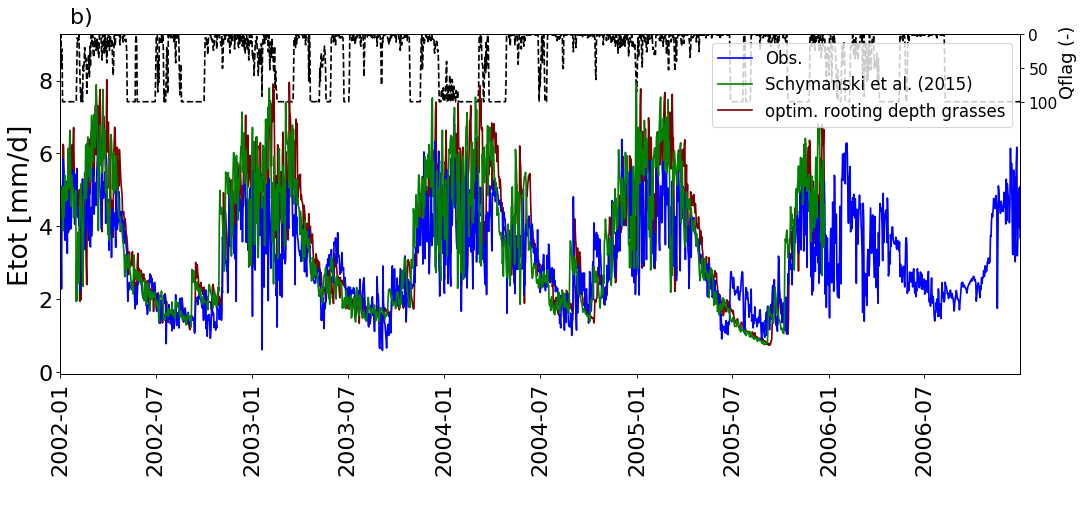

In [9]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/7_rgdepth/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake$ [mol/m$^2$/d]" \
--labels "optim. rooting depth grasses" --title "a)" --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/7_rgdepth/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "optim. rooting depth grasses" --title "b)" --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt


**Figure S1.7**. Comparison for Howard Springs between the result of Schymanski et al. (2015), where grass rooting depths were fixed at 1.0m (green) and new runs that optimize the rooting depth of grasses (brown), for a) assimilation and b) evaporation. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. The results for the fluxes are rather similar eventually, but the final rooting depths are different. In the new runs, rooting depth for grasses reaches 0.5m and trees 4m, whereas results of Schymanski et al. (2015) converged to 4.2m for trees.

## Costfactor for water transport capacity

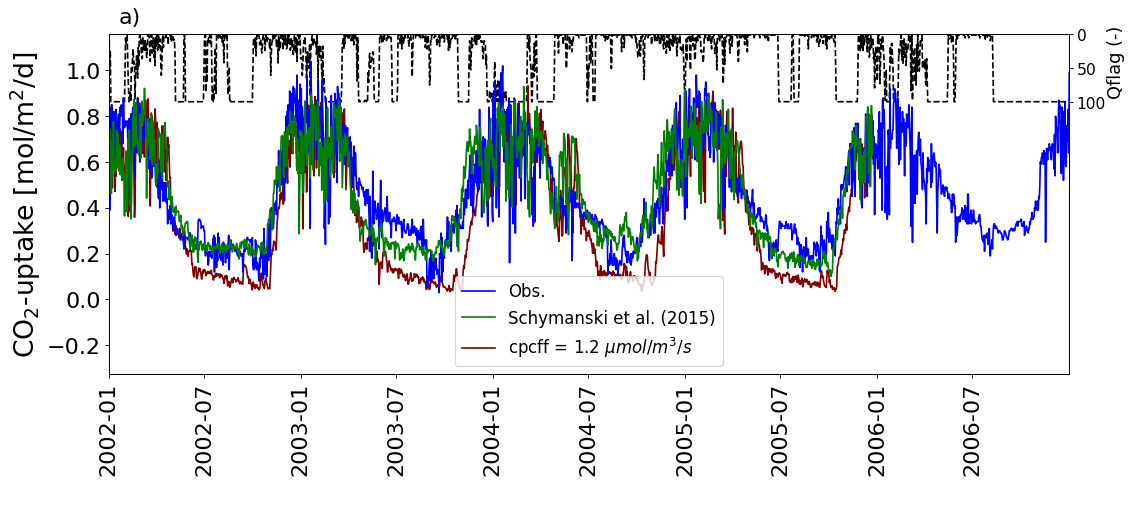

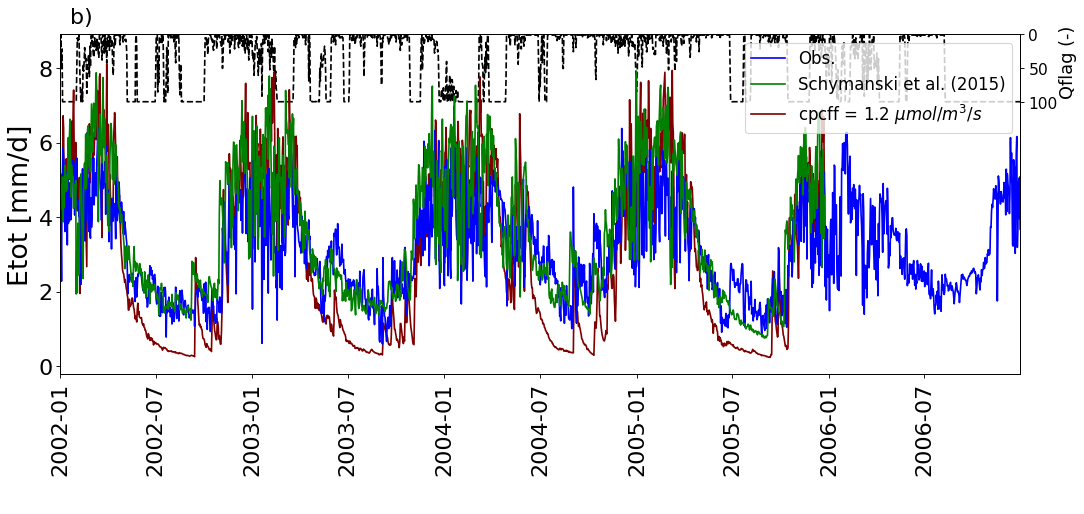

In [10]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/8_cpcff/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "cpcff = 1.2 $\mu mol/m^3/s$" --title "a)" --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/8_cpcff/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "cpcff = 1.2 $\mu mol/m^3/s$" --title "b)" --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt

**Figure S1.8**. Comparison for Howard Springs between the result of Schymanski et al. (2015), where the costfactor for water transport capacity was set at 1.0 $\mu mol/m3/s$ (green) and new runs that use is set to 1.2 $\mu mol/m3/s$ (brown), for a) assimilation and b) evaporation. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. There is a strong difference in the two model runs with different values for the costfactor for water transport. Especially during the wet period the values for assimilation and evaporation are much lower for a higher costfactor.

## Weatherdata

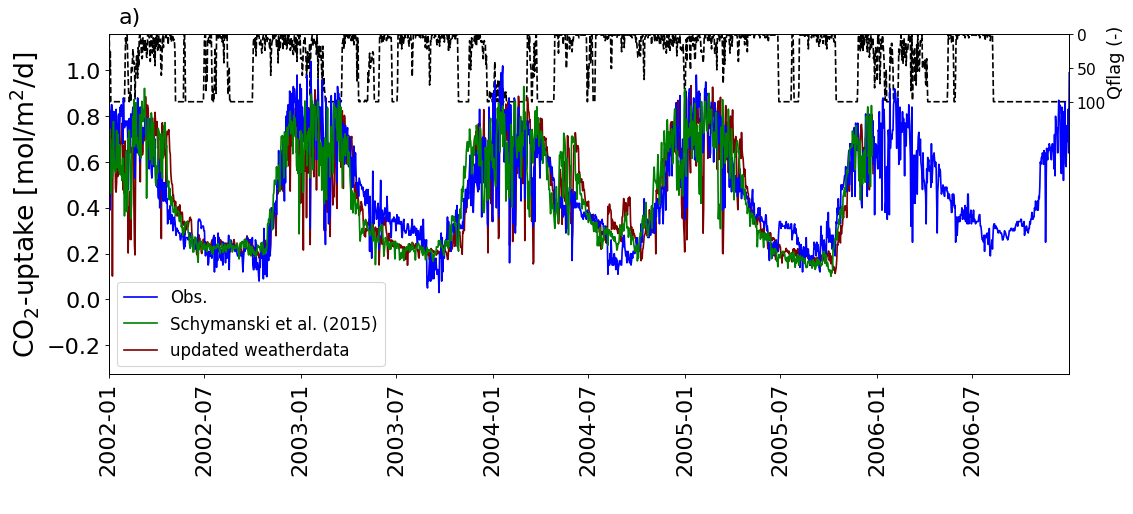

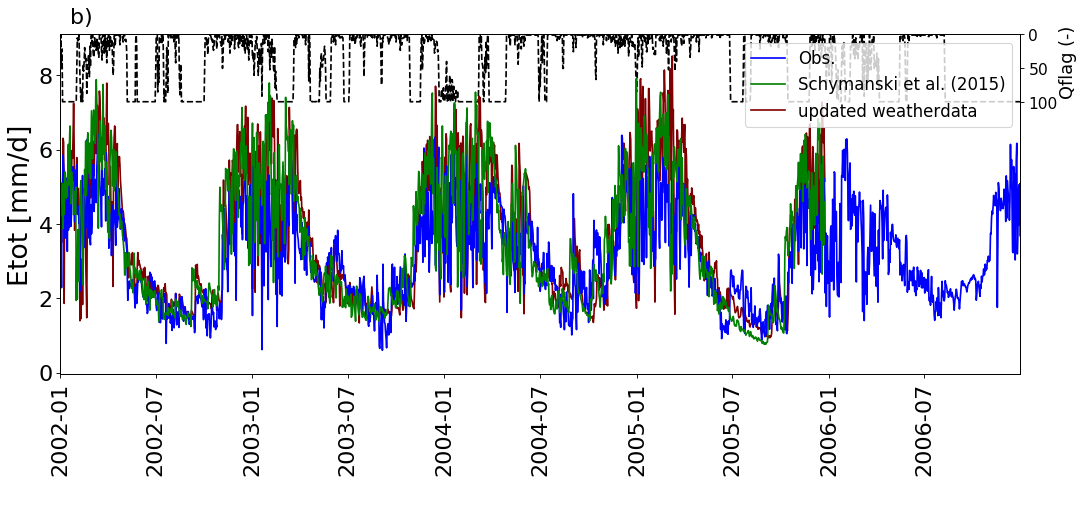

In [11]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/9_weather/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "updated weatherdata" --title "a)" --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/9_weather/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "updated weatherdata" --title "b)" --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt

**Figure S1.9**. Comparison for Howard Springs between the result of Schymanski et al. (2015) (green) and new runs that use a new version of SILO-datadrill, including variable atmosperic levels (brown), for a) assimilation and b) evaporation. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. The model runs only show minor differences, similar to differences obtained by re-running the SCE-optimization (Figure S1.2).

## New soil parameters and hydrology

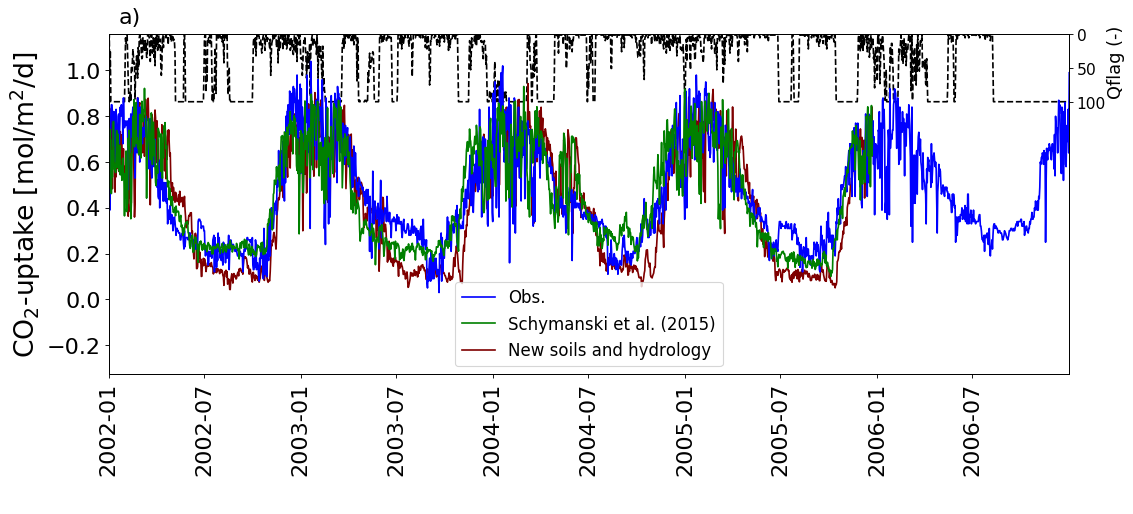

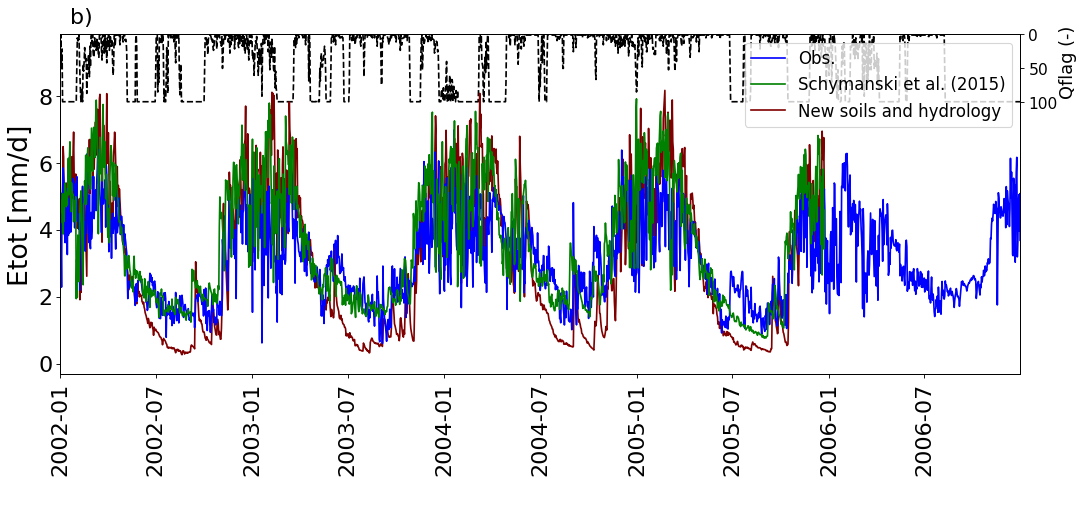

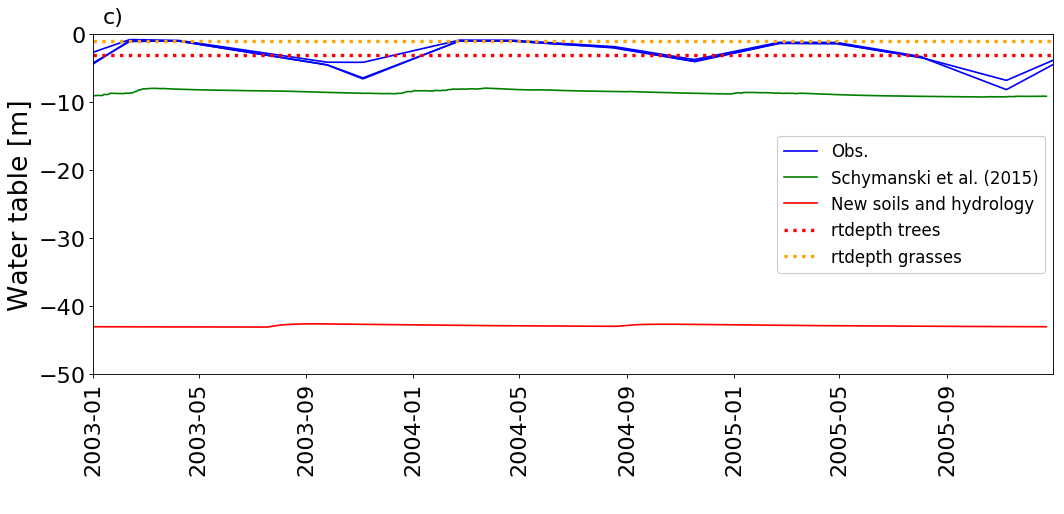

In [12]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/12_soil/sce_best/results_daily.txt \
-v asstot --var2015 asstot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 --ylabel "CO$_2$-uptake [mol/m$^2$/d]" \
--labels "New soils and hydrology" --title "a)" --legend True --obs_qc ../../data/DINGO_QC/FcQ_howard.txt

%run ../../src_py/plot_et_ass.py  \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-i ../../data/VOM_output/additional_analyses/comp2015/12_soil/sce_best/results_daily.txt \
-v evaptot --var2015 evaptot -ys 2002 -ye 2006 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 --ylabel "Etot [mm/d]" \
--labels "New soils and hydrology" --title "b)" --legend True --obs_qc ../../data/DINGO_QC/FeQ_howard.txt

%run ../../src_py/plot_gw.py  \
-i ../../data/VOM_output/additional_analyses/comp2015/12_soil/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt\
--depth True -ys 2003 -ye 2005 \
--ylabel "Water table [m]"  \
--labels VOM \
--colors "red" \
--i_cz 48.40  \
--i_cz2015 15 \
--obs ../../data/boreholes/RN030982.csv \
../../data/boreholes/RN030983.csv \
../../data/boreholes/RN030984.csv \
--pars ../../work/additional_analyses/comp2015/12_soil/best/input/pars.txt \
--labels "New soils and hydrology"  --title "c)" --legend True


**Figure S1.10**. Comparison for Howard Springs between the result of Schymanski et al. (2015) (green) and new runs that use new soil parameters based on the Soil and Landscape Grid of Australia  and free draining hydrological parameters (brown), for a) assimilation b) evaporation, c) groundwater tables. The daily average quality flags of the fluxtower observations are shown in dashed lines with a value of 100 when a day is completely gap-filled and 1 when it is observed. Differences occur for assimilation, but the differences are even bigger for the evaporation, especially during the dry season. The higher groundwater tables lead to more water that is accessible for evaporation in the set-up of Schymanski et al. (2015), and therefore evaporation raters are higher in comparison with the new runs.


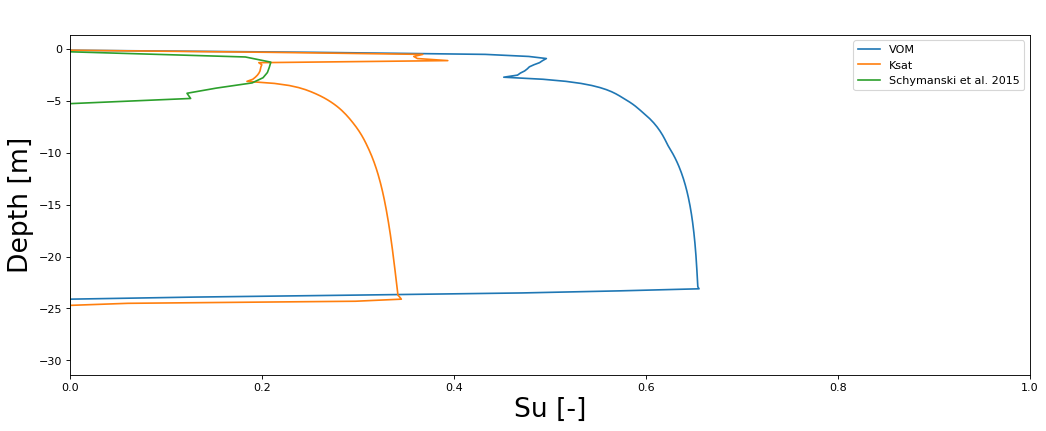

In [57]:
#HowardSprings
%run ../../src_py/plot_smprofile.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/12_soil/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
-d 0.20 0.20 0.50 \
-cz 30 -nd 3650 --ylabel "Depth [m]" --xlabel "Su [-]" --cbar_min 0.10 --cbar_max 1.00 \
--cblabel "Layer thickness [m]" --plot_cbar 0 --xlim 0 1 \
--label "VOM" "new hydrology" "Schymanski et al. 2015"



## Change of Ksat

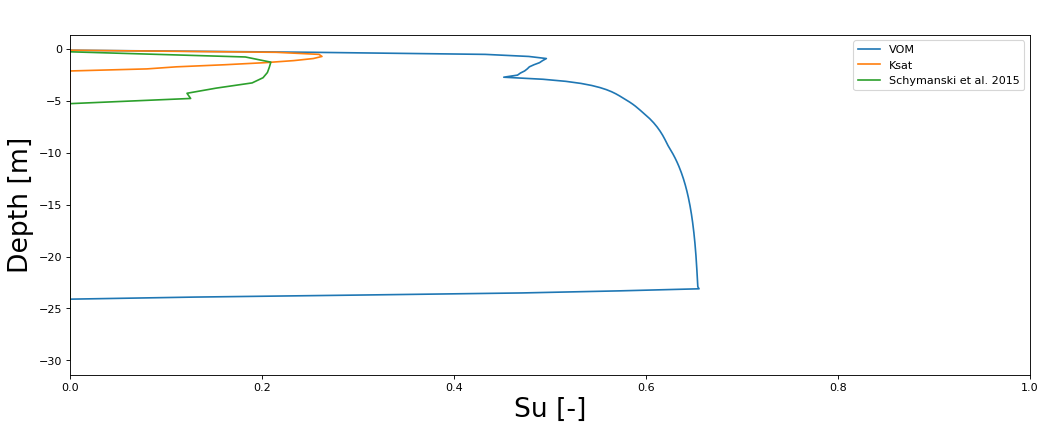

In [56]:
#HowardSprings
%run ../../src_py/plot_smprofile.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/14_ksat/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
-d 0.20 0.20 0.50 \
-cz 30 -nd 3650 --ylabel "Depth [m]" --xlabel "Su [-]" --cbar_min 0.10 --cbar_max 1.00 \
--cblabel "Layer thickness [m]" --plot_cbar 0 --xlim 0 1 \
--label "VOM" "Ksat" "Schymanski et al. 2015"



# Resulting differences

Eventually, all implemented changes lead to differences in model results. Here, several differences are assessed.

## Total evaporation

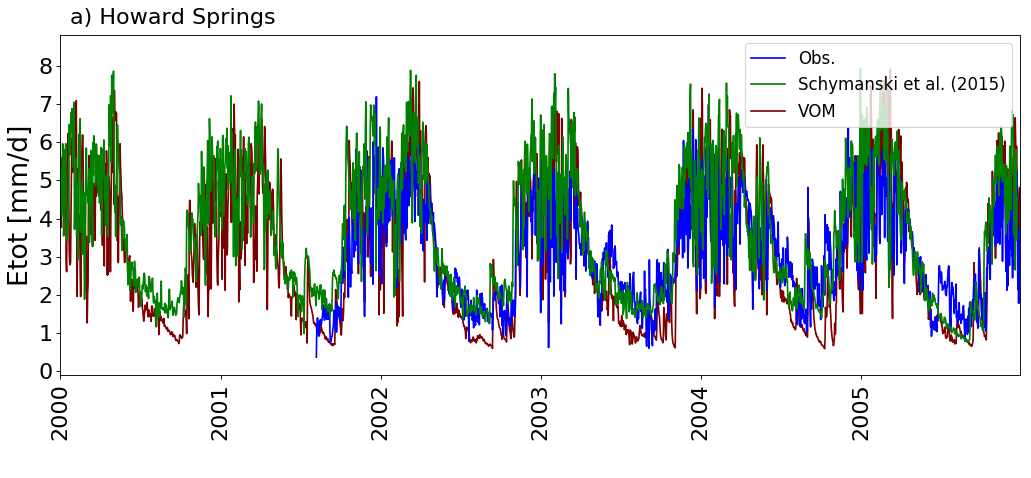

In [6]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v evaptot --var2015 evaptot -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "Etot [mm/d]" --labels VOM \
--obs ../../data/DINGO/Ea_howard.txt --mf 1000 \
--title "a) Howard Springs" --legend True

## Soil evaporation

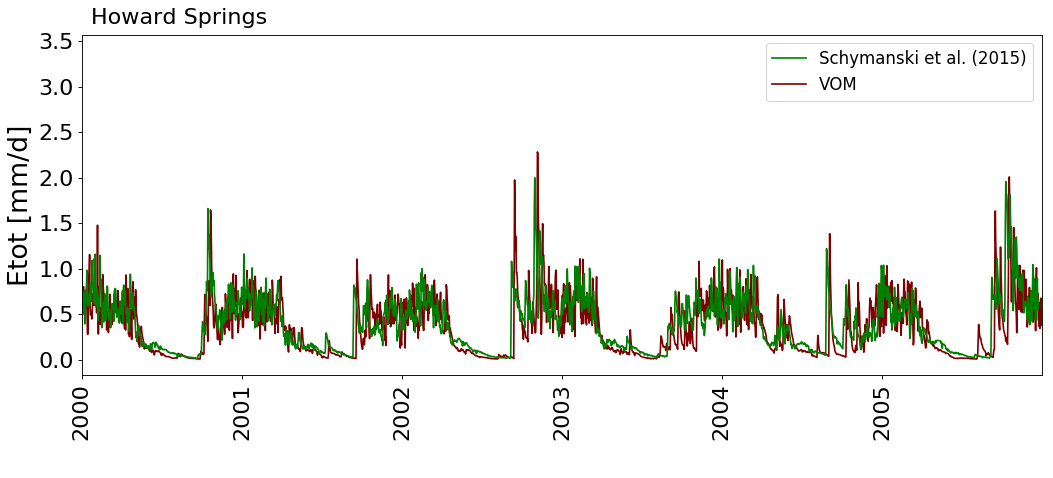

In [11]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v esoil --var2015 esoil -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "Etot [mm/d]" --labels VOM \
--mf 1000 \
--title "Howard Springs" --legend True

## Tree transpiration

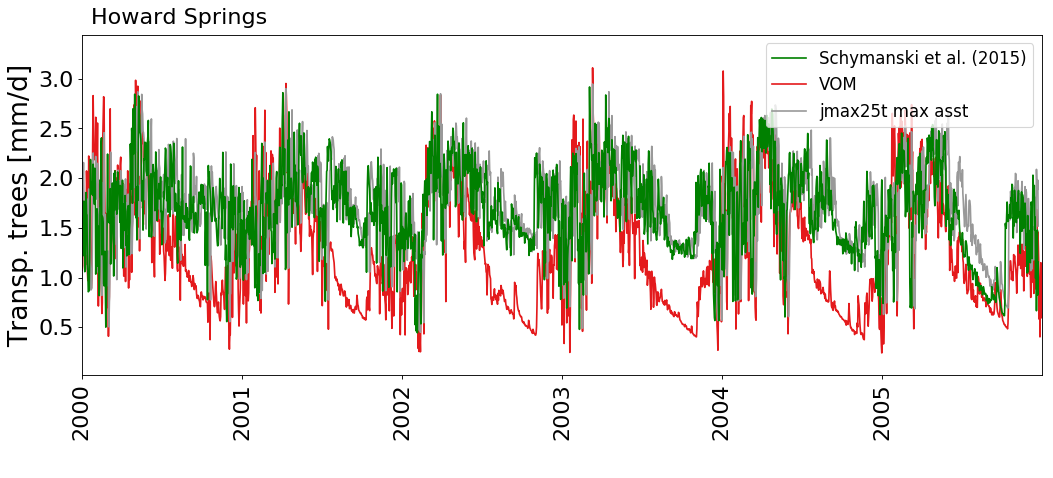

In [47]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
/home/remko/Documents/Models/VOM/VOM_fork/local_tests/test2015_jmax25/output/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v etmt --var2015 etm_t -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "Transp. trees [mm/d]" --labels VOM \
--labels "VOM" "jmax25t max asst" --legend True\
--title "Howard Springs" --palette Set1 \
--mf 1000 

## Grass transpiration

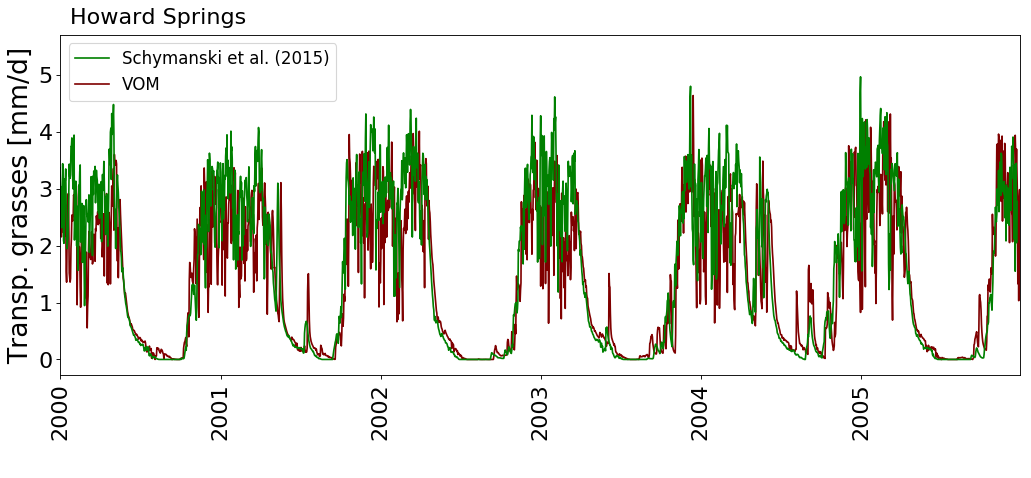

In [12]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v etmg --var2015 etm_g -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "Transp. grasses [mm/d]" --labels VOM \
--mf 1000 \
--title "Howard Springs" --legend True

## Total assimilation

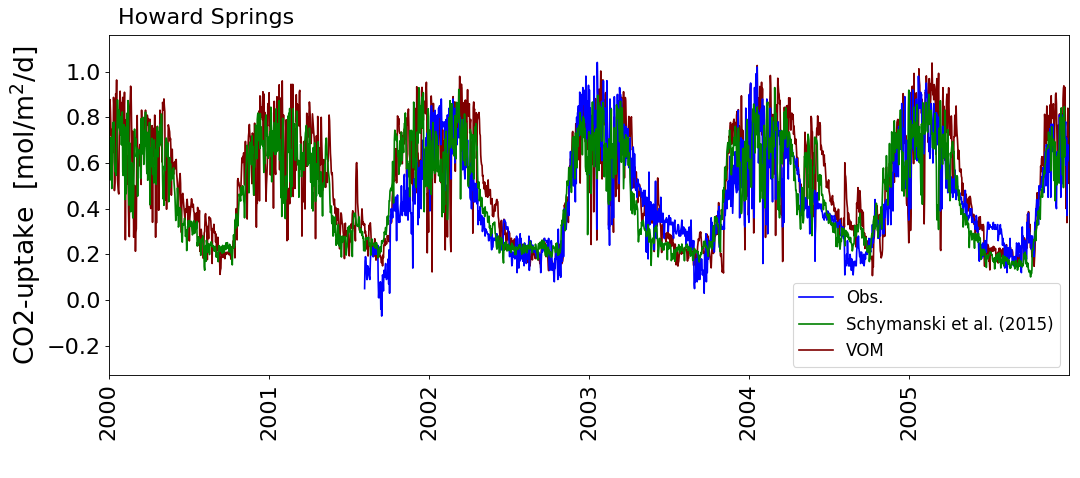

In [14]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v asstot --var2015 asstot -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "CO2-uptake  [mol/m$^2$/d]" --labels VOM \
--obs ../../data/DINGO/GPPdaily_howard.txt --mf_obs -1 \
--title "Howard Springs" --legend True

## Assimilation trees

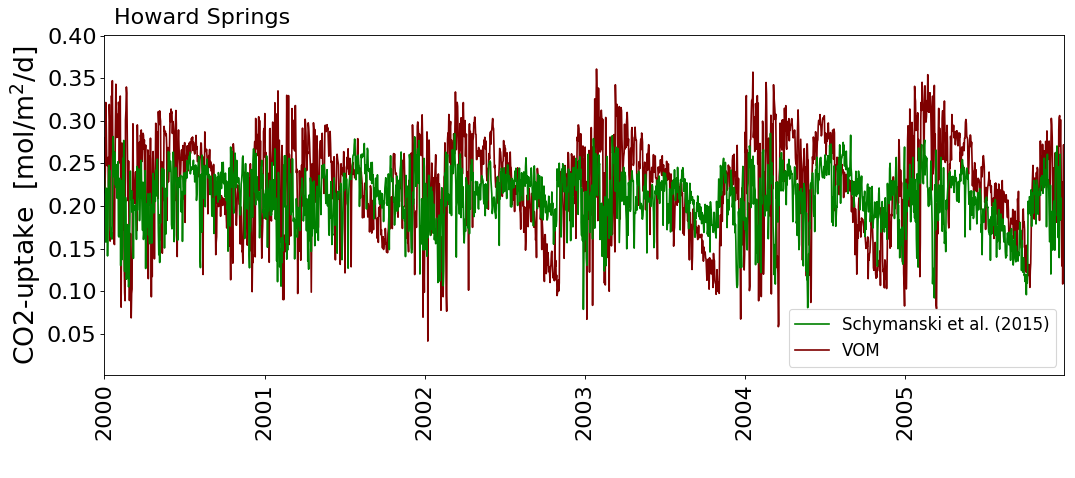

In [16]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v asst --var2015 ass_t -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "CO2-uptake  [mol/m$^2$/d]" --labels VOM \
--title "Howard Springs" --legend True

## Assimilation grasses

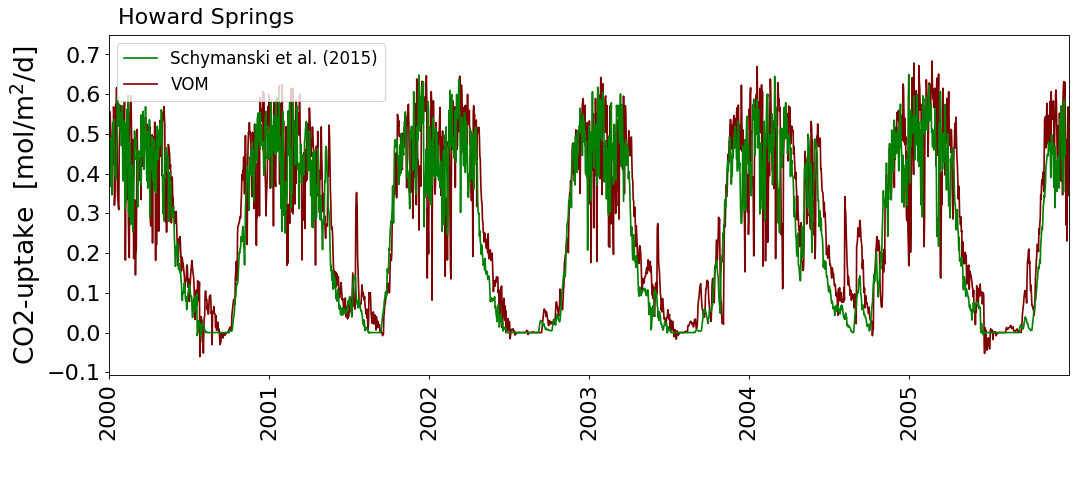

In [17]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v assg --var2015 ass_g -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "CO2-uptake  [mol/m$^2$/d]" --labels VOM \
--title "Howard Springs" --legend True

## Water storage

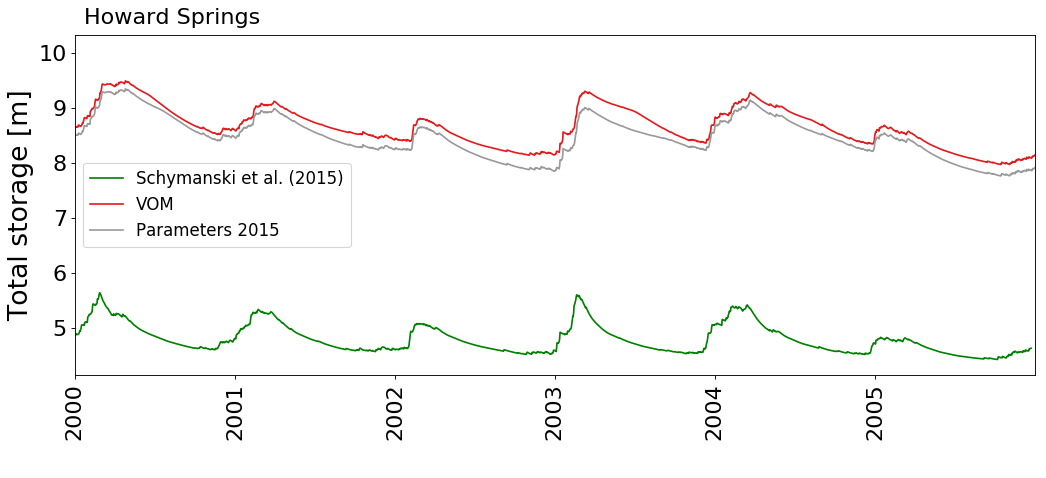

In [53]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/13_new_params2015/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v ws --var2015 ws -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "Total storage [m]" \
--labels "VOM" "Parameters 2015" "Schymanski et al. 2015" --legend True \
--title "Howard Springs" --palette Set1 

## Soil moisture profile

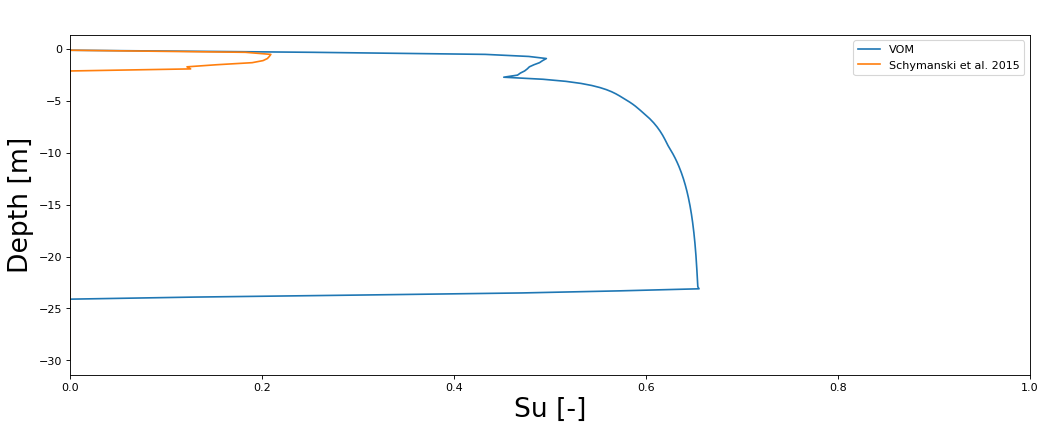

In [58]:
#HowardSprings
%run ../../src_py/plot_smprofile.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/su_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/0_benchmark/suvechourly.txt \
-d 0.20 0.20 0.50 \
-cz 30 -nd 3650 --ylabel "Depth [m]" --xlabel "Su [-]" --cbar_min 0.10 --cbar_max 1.00 \
--cblabel "Layer thickness [m]" --plot_cbar 0 --xlim 0 1 \
--label "VOM"  "Schymanski et al. 2015"



## Groundwater

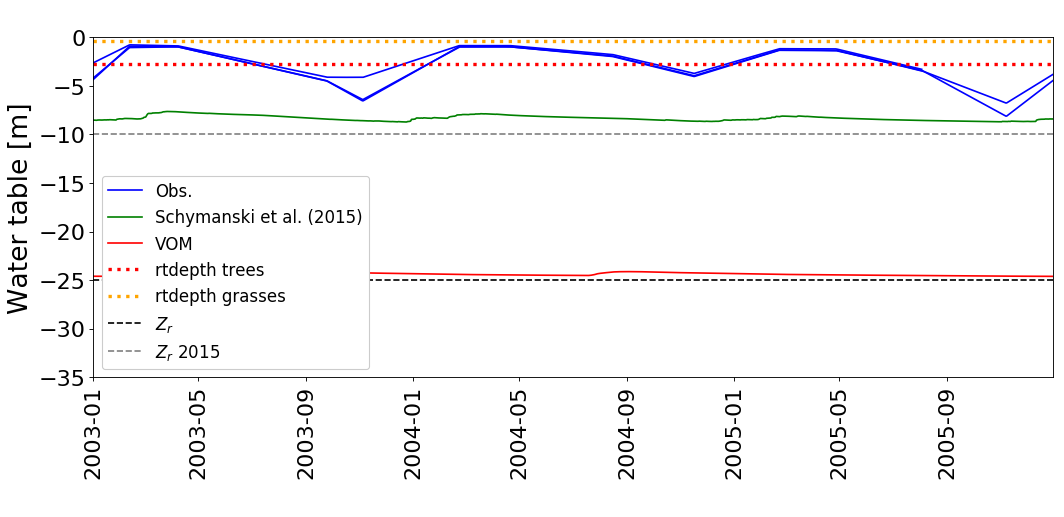

In [13]:
#plot groundwater tables
%run ../../src_py/plot_gw.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt\
--depth True -ys 2003 -ye 2005 \
--ylabel "Water table [m]"  \
--labels VOM \
--colors "red" \
--i_cz 30  \
--i_zr 5 \
--i_cz2015 15 \
--i_zr2015 5 \
--obs ../../data/boreholes/RN030982.csv \
../../data/boreholes/RN030983.csv \
../../data/boreholes/RN030984.csv \
--pars ../../work/HowardSprings/freedrainage_cpcff1.0/best/input/pars.txt \
--legend True --xloc_title -0.05 --size_title 24 \
--ylim -35 0

**Figure S1.11**. Groundwater depths for a) Howard Springs and b) Adelaide River. Dashed lines represent the bedrock depth, dotted lines the rooting depths (trees in red and grasses in orange), the VOM-results are shown in blue, the results of Schymanski et al. (2009) in green.

## Vegetation cover

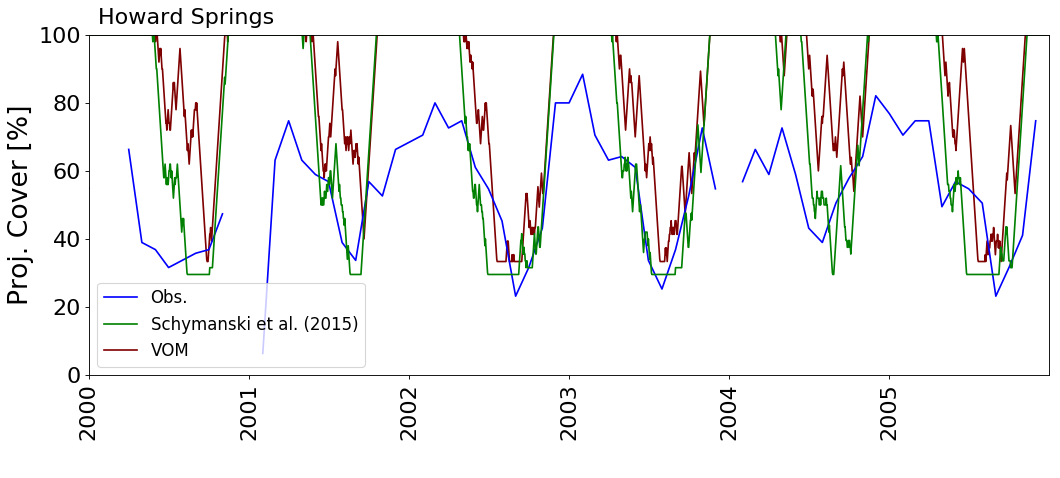

In [34]:
%run ../../src_py/plot_vegetation.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v pc --var2015 pc -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--obs ../../data/fPAR/fpar_howard_v5.txt --obsdates ../../data/fPAR/dates_v5 \
--ylabel "Proj. Cover [%]" --mf 100 \
--title "Howard Springs" --legend True 


## Electron transport capacity

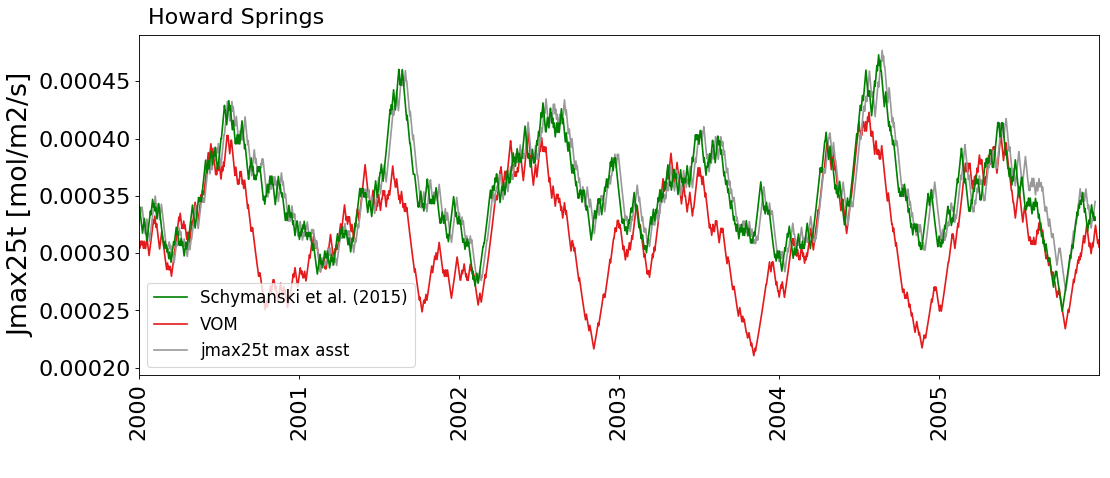

In [45]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
/home/remko/Documents/Models/VOM/VOM_fork/local_tests/test2015_jmax25/output/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v jmax25t --var2015 jmax25_t -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "Jmax25t [mol/m2/s]" \
--labels "VOM" "jmax25t max asst" --legend True\
--title "Howard Springs" --palette Set1 

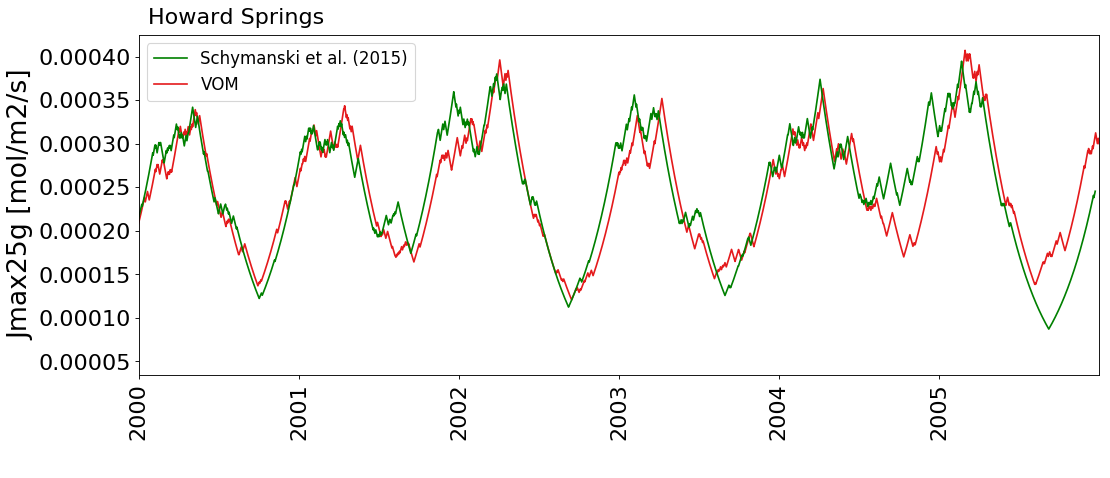

In [41]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v jmax25g --var2015 jmax25_g -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "Jmax25g [mol/m2/s]" \
--labels VOM --legend True\
--title "Howard Springs" --palette Set1 

## Lambda

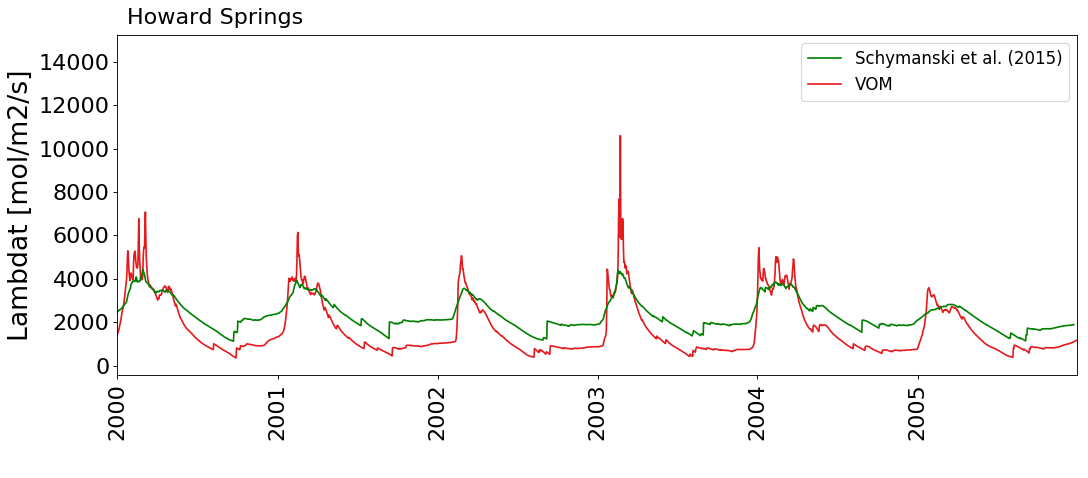

In [48]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v lambdat --var2015 lambda_t -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "Lambdat [mol/m2/s]" \
--labels "VOM" "jmax25t max asst" --legend True\
--title "Howard Springs" --palette Set1 

# Parameters 2015, new set-up

/home/remko/.local/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


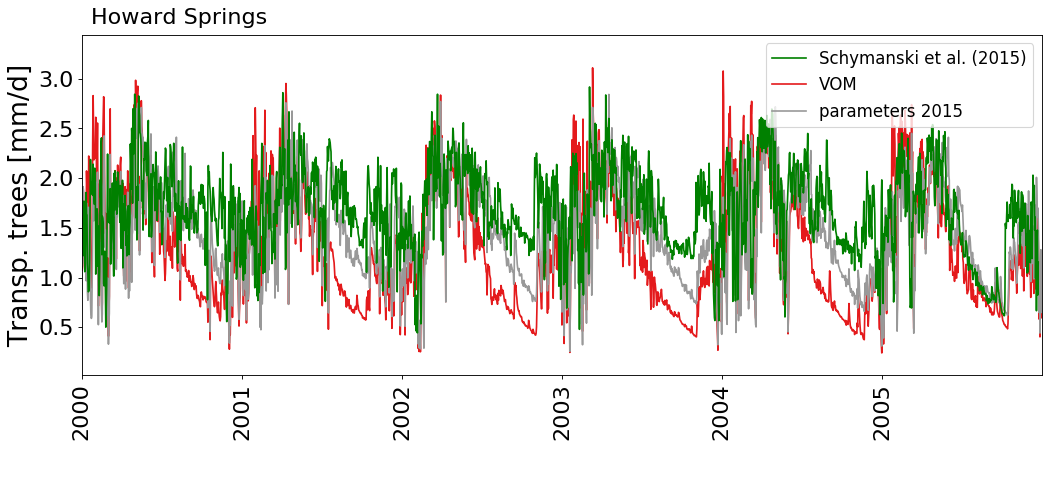

In [49]:
#HowardSprings
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt \
../../data/VOM_output/additional_analyses/comp2015/13_new_params2015/results_daily.txt \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt \
-v etmt --var2015 etm_t -ys 2000 -ye 2005 -w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--ylabel "Transp. trees [mm/d]" --labels VOM \
--labels "VOM" "parameters 2015" --legend True\
--title "Howard Springs" --palette Set1 \
--mf 1000 

In [14]:
data = np.genfromtxt( "../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_daily.txt", names=True)
ws =  (data["ws"] )
su = (data["su_avg"] )
etot =  (data["etmt"] + data["etmg"] + data["esoil"] )

#values observations
obs = (np.loadtxt("../../data/DINGO/Ea_howard.txt", usecols=2) )   #mm/d

#date/times observations
tobs = np.genfromtxt("../../data/DINGO/Ea_howard.txt",usecols=0, dtype=np.str )#mm/d
tobs = pd.date_range(tobs[0], tobs[-1], freq='D')   

obs_pd = pd.Series(obs, index= tobs)

tmod = pd.date_range(datetime(int(data["fyear"][0]),int(data["fmonth"][0]),int(data["fday"][0])), 
                  datetime(int(data["fyear"][-1]),int(data["fmonth"][-1]),int(data["fday"][-1])), freq='D')

#make dataframes for ws and su_ave
ws_pd = pd.Series(ws, index = tmod)
su_pd = pd.Series(su, index = tmod)
etot_pd = pd.Series(etot, index = tmod)

#get values at start of dry season (May 1)
ws_may1 = ws_pd[ (ws_pd.index.month == 5) & (ws_pd.index.day == 1) & (ws_pd.index.year >= obs_pd.index.year[0]) 
              & (ws_pd.index.year <= obs_pd.index.year[-1])  ]

su_may1 = su_pd[ (su_pd.index.month == 5) & (su_pd.index.day == 1) & (su_pd.index.year >= obs_pd.index.year[0]) 
              & (su_pd.index.year <= obs_pd.index.year[-1])  ]


In [15]:


data2015 = np.genfromtxt( "../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultsdaily.txt", names=True)
ws2015 =  (data2015["ws"] )
su2015 =  (data2015["su_avg"] )
etot2015 =  (data2015["etm_t"] + data2015["etm_g"] + data2015["esoil"] )

tmod2015 = pd.date_range(datetime(int(data2015["year"][0]),int(data2015["month"][0]),int(data2015["day"][0])), 
                 periods = len(data2015["month"]) , freq='D')

ws2015_pd = pd.Series(ws2015, index = tmod2015)
su2015_pd = pd.Series(su2015, index = tmod2015)
etot2015_pd = pd.Series(etot2015, index = tmod2015)

#get values at start of dry season (May 1)
ws_2015may1 = ws2015_pd[ (ws2015_pd.index.month == 5) & (ws2015_pd.index.day == 1) & (ws2015_pd.index.year >= obs_pd.index.year[0]) 
              & (ws2015_pd.index.year <= obs_pd.index.year[-1])  ]

su_2015may1 = su2015_pd[ (su2015_pd.index.month == 5) & (su2015_pd.index.day == 1) & (su2015_pd.index.year >= obs_pd.index.year[0]) 
              & (su2015_pd.index.year <= obs_pd.index.year[-1])  ]

In [16]:
def calcREmean_seasonal(sim, obs, start, end ):

        if start < end:
            obs_sel =obs.loc[ (obs.index.month >= start) &  (obs.index.month <= end)]
            sim_sel =sim.loc[ (sim.index.month >= start) &  (sim.index.month <= end)]
        if start > end: 
            obs_sel =obs.loc[ (obs.index.month >= start) |  (obs.index.month <= end)]
            sim_sel =sim.loc[ (sim.index.month >= start) |  (sim.index.month <= end)]

        #residual errors
        mu_s = sim_sel.resample("A").mean()
        mu_o = obs_sel.resample("A").mean()

        RE = (mu_s-mu_o)/mu_o               
        
        return(RE)

In [17]:

dates_overlap = tmod.intersection(obs_pd.index)

RE_et = calcREmean_seasonal(1000*etot_pd[dates_overlap], obs_pd[dates_overlap], 5, 9)
RE_et2015 = calcREmean_seasonal(1000*etot2015_pd[dates_overlap], obs_pd[dates_overlap], 5, 9)


<Figure size 1120x240 with 0 Axes>

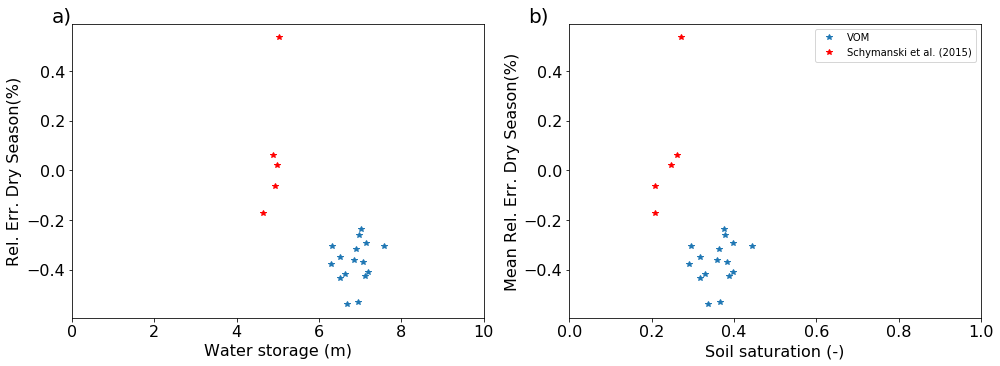

In [18]:

fig=plt.figure(figsize=(14, 3), dpi= 80, facecolor='w', edgecolor='k')
fig, ax   = plt.subplots(nrows=1, ncols=2, figsize=(14,5))   


ax[0].plot(  ws_may1, RE_et, "*", label = "VOM"  )
ax[0].plot(  ws_2015may1, RE_et2015[~np.isnan(RE_et2015)], "r*" , label = "Schymanski et al. (2015)"   )

ax[0].set_xlim([0, 10])    
ax[0].set_xlabel(r"Water storage (m)", size = 16)
ax[0].set_ylabel('Rel. Err. Dry Season(%)', size = 16)
ax[0].text( x=-0.5, y=0.6, s="a)",  fontsize = 20)

for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
    
    
ax[1].plot( su_may1, RE_et, "*", label = "VOM"      )
ax[1].plot( su_2015may1, RE_et2015[~np.isnan(RE_et2015)], "r*"  , label = "Schymanski et al. (2015)"   )

ax[1].set_xlim([0, 1])    

    
ax[1].set_xlabel(r"Soil saturation (-)", size = 16)
ax[1].set_ylabel('Mean Rel. Err. Dry Season(%)', size = 16)
ax[1].text( x=-0.1, y=0.6, s="b)",  fontsize = 20)


for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(16)
for tick in ax[1].yaxis.get_major_ticks():
    tick.label.set_fontsize(16)
    
plt.legend()
plt.tight_layout()
plt.show()

**Figure S1.12**. Relative error between modelled and flux tower evaporation for the VOM and the results of Schymanski et al (2015), against a) total water storage and c) average soil moisture saturation at May 1 (start of dry season).